In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
#Data Loading
df =  pd.read_csv("credit_score.csv", low_memory=False)
df = df.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'])
df.sample(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
28491,April,23,Scientist,95844.33,7997.027500,1,3,4,-100,16,...,7.0,_,479.27,34.997137,No,264.765024,551.7706176324849,Low_spent_Medium_value_payments,263.16710845712885,Poor
89087,August,18,Writer,32144.54,2950.711667,9,7,32,8,28,...,6.0,Bad,3360.92,37.337103,Yes,166.090653,242.1195285751291,Low_spent_Small_value_payments,176.86098522197787,Standard
10638,July,38,Musician,89757.46,6373.027993,2,1,2,-100,1,...,0.0,Good,149.48,32.744756,No,943.760341,NaN,!@9#%8,535.6159833511476,Good
40446,July,48,_______,15641.73,NaN,1,4,8,4,2,...,3.0,Good,1429.18,35.303347,No,30.882707,91.25462230957126,Low_spent_Large_value_payments,268.41042027265496,Good
55421,June,32,Accountant,31700.3_,2444.691667,10,8,16,-100,28,...,9.0,Standard,2482.73,38.989328,Yes,69742.000000,215.93351919534481,Low_spent_Small_value_payments,251.66953013149947,Poor


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [21]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [22]:
#Data Cleaning
pd.set_option('future.no_silent_downcasting', True)
df['Age'] = df['Age'].str.replace('_','')
df['Age'] = df['Age'].astype(int)
df['Occupation'] = df['Occupation'].replace('_______',np.nan)
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Credit_Score'] = df['Credit_Score'].replace(['Poor','Standard','Good'],[0,1,2])
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','')
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_','')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM','No')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(['Yes','No'],[1,0])
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix'] = df['Credit_Mix'].replace(['Standard','Good','Bad'],[1,2,0])
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

#Filling Missing Values
df = df.ffill()
df = df.bfill()
df['Credit_Mix'] = df['Credit_Mix'].astype(int)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype(int)
df['Credit_Score'] = df['Credit_Score'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

In [23]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

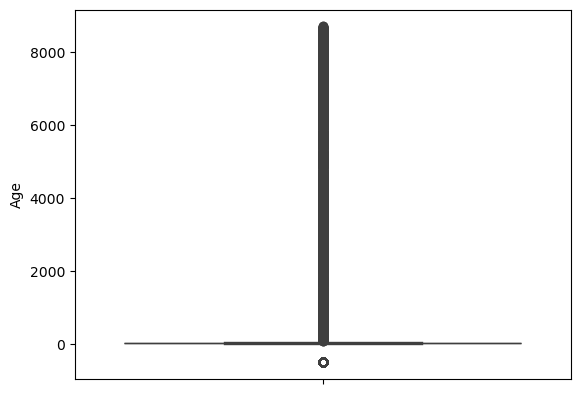

In [24]:
sns.boxplot(df['Age'])
plt.show()

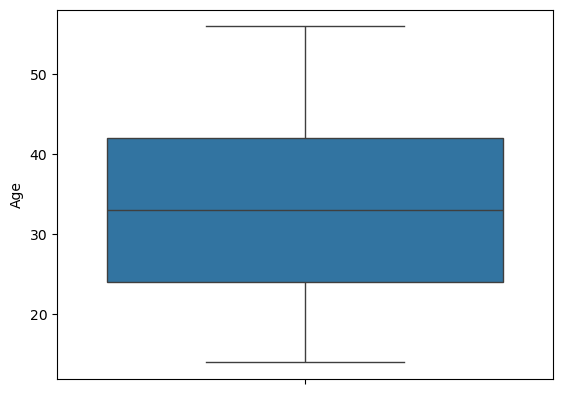

In [25]:
#Outlier Detection
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
data = df[(df['Age'] >= q1 - 1.5*iqr) & (df['Age'] <= q3 + 1.5*iqr)]
sns.boxplot(data['Age'])
plt.show()

In [26]:
#Feature Engineering

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])
df['Month'] = le.fit_transform(df['Month'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

In [27]:
#Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for i in df.columns:
    if i != 'Credit_Score':
        col_list.append(i)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.277722
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13                Credit_Mix  0.321474
14          Outstanding_Debt  0.396141
15  Credit_Utilization_Ratio  0.024506
16     Payment_of_Min_Amount  0.476749
17       Total_EMI_per_month  0.972258
18   Amount_invested_monthly  0.911321
19         Payment_Behaviour  0.310525
20           Monthly_Balance  1.000207


In [28]:
x = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, y_pred)*100}%')

Accuracy : 61.975%


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred)*100}%')

Accuracy : 68.91000000000001%


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred)*100}%')

Accuracy : 79.675%
